In [1]:
import numpy as np   # 科学计算库、矩阵计算、数组计算、多维矩阵和数组
import pandas as pd  # 数据集的处理，二维dataframe（表格） 一维series

In [2]:
rowdata = {'颜色深度':[14.23,13.2,13.16,14.37,13.24,12.07,12.43,11.79,12.37,12.04],
          '酒精浓度':[5.64,4.38,5.68,4.80,4.32,2.76,3.94,3.  ,2.12,2.6 ],
          '品种':[0,0,0,0,0,1,1,1,1,1]}        
rowdata

{'颜色深度': [14.23, 13.2, 13.16, 14.37, 13.24, 12.07, 12.43, 11.79, 12.37, 12.04],
 '酒精浓度': [5.64, 4.38, 5.68, 4.8, 4.32, 2.76, 3.94, 3.0, 2.12, 2.6],
 '品种': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]}

In [3]:
# 0 代表 “黑皮诺”，1 代表 “赤霞珠” 

wine_data = pd.DataFrame(rowdata)

wine_data

,颜色深度,酒精浓度,品种
0,14.23,5.64,0
1,13.20,4.38,0
2,13.16,5.68,0
3,14.37,4.80,0
4,13.24,4.32,0
5,12.07,2.76,1
6,12.43,3.94,1
7,11.79,3.00,1
8,12.37,2.12,1
9,12.04,2.60,1


In [7]:
X = np.array(wine_data.iloc[:,0:2])
X

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [8]:
y  = np.array(wine_data.iloc[:,-1])
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [10]:
X[:,0] # 颜色深度

array([14.23, 13.2 , 13.16, 14.37, 13.24, 12.07, 12.43, 11.79, 12.37,
       12.04])

In [15]:
# 赤霞珠？
y==1

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [16]:
wine_data.iloc[y==1,0]

5    12.07
6    12.43
7    11.79
8    12.37
9    12.04
Name: 颜色深度, dtype: float64

In [19]:
X[[False, False, False, False, False,  True,  True,  True,  True,True]]

array([[12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [21]:
X[y==1,0]

array([12.07, 12.43, 11.79, 12.37, 12.04])

In [12]:
import matplotlib.pyplot as plt

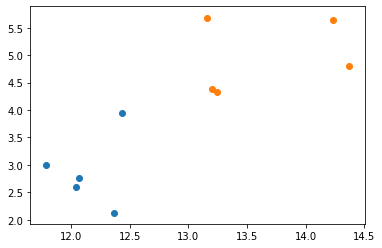

In [23]:
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==0,0],X[y==0,1])

- 算距离：未知数据和原始数据的距离

- 找邻居

- 做分类

In [24]:
import math

In [25]:
new_data=np.array([12.8,4.1]) 

In [36]:
distance = [math.sqrt(np.sum((i-new_data)**2)) for i in X]   # i是遍历对象，X特征矩阵
distance

[2.101547049199708,
 0.4882622246293471,
 1.6204937519163718,
 1.7189822570346662,
 0.49193495504995355,
 1.5259423318068084,
 0.4031128874149283,
 1.4933519344079622,
 2.026153992173349,
 1.6815469068687918]

In [33]:
# 升序排序返回对应的索引位置
sort_dist = np.argsort(distance)
sort_dist

array([6, 1, 4, 7, 5, 2, 9, 3, 8, 0])

In [38]:
y[sort_dist[:3]]  # 匹配标签对应的值

array([1, 0, 0])

In [39]:
# 投票
from collections import Counter
Counter(y[sort_dist[:3]])

Counter({1: 1, 0: 2})

In [46]:
Counter(y[sort_dist[:3]]).most_common(n=1)  # n指的是提取元素的数量

[(0, 2)]

In [51]:
dict([(0,2)])

{0: 2}

In [59]:
Counter(y[sort_dist[:3]]).most_common(n=1)[0][0]

0

In [56]:
l = [(0, 2)]

In [58]:
l[0][0]

0

### scikit-learn

In [60]:
from sklearn.neighbors import KNeighborsClassifier  # 调用KNN分类器

- 实例化

- 训练数据

- 输出结果（各种属性接口的调用）

In [95]:
# 实例化对象：加入必备的参数
clf = KNeighborsClassifier(n_neighbors=4)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [96]:
# 训练数据：fit   特征必须是二维的数组，y是一维的数组
clf.fit(X,y)  # 模型已经学习完成了

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [97]:
clf = clf.fit(X,y)

In [98]:
# 输出结果：预测new_data是属于哪一个类别的
clf.predict([new_data])

array([0])

In [90]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X,y)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [94]:
new_data

array([12.8,  4.1])

In [92]:
# 输出分数：准确率结果
clf.score([new_data],[1])   #  验证模型是否能正确判断样本的标签，传入的是当前样本集的特征及其对应的真实标签 。
# 预测正确的样本数量/总样本数量

0.0

In [99]:
# 输出概率
clf.predict_proba([new_data])

array([[0.5, 0.5]])

### 使用sklearn中的数据集进行练习

In [100]:
from sklearn.datasets import load_breast_cancer   # 二分类数据

In [101]:
# 数据实例化
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [103]:
X = data.data  # 特征
y = data.target   # 标签

In [106]:
X.shape

(569, 30)

In [107]:
y.shape

(569,)

### 划分数据集

目的：对模型进行评估
方法：将数据集切分成训练集和验证集（模拟题）
怎么做：对训练集做学习，对验证集做预测，再基于验证集的预测结果和真实值的对比，评估模型的泛化能力。

In [116]:
Counter(y)

Counter({0: 212, 1: 357})

In [148]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=0)   # 训练集占80% 测试集占20%

In [121]:
pd.Series(Ytrain).value_counts()

1    289
0    166
dtype: int64

In [122]:
pd.Series(Ytest).value_counts()

1    68
0    46
dtype: int64

In [149]:
clf = KNeighborsClassifier(n_neighbors=3).fit(Xtrain,Ytrain)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [150]:
clf.score(Xtest,Ytest)

0.9122807017543859

### 学习曲线

In [151]:
score = []  # 初始化列表用来存储不同参数取值下的准确率分数
k = range(1,20)  # 参数的取值范围

for i in k:
    clf = KNeighborsClassifier(n_neighbors=i).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))

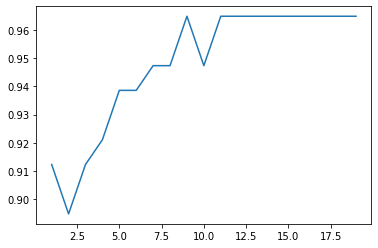

In [152]:
plt.plot(k,score)

In [153]:
score

[0.9122807017543859,
 0.8947368421052632,
 0.9122807017543859,
 0.9210526315789473,
 0.9385964912280702,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.9649122807017544,
 0.9473684210526315,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544]

由于数据样本构成的不同（训练集不同）会造成模型的不稳定性，不稳定性会造成泛化能力的不稳定。

### 交叉验证

In [154]:
from sklearn.model_selection import cross_val_score

In [158]:
clf = KNeighborsClassifier(n_neighbors=5)
cv = cross_val_score(clf,Xtrain,Ytrain,cv=5)   # 将数据集划分成5个子集，模型会做5次训练

In [159]:
cv.mean()  # 交叉验证平均结果

0.9208791208791209

### 结合交叉验证和学习曲线调整参数n_neighbors

In [160]:
score = []  # 初始化列表用来存储不同参数取值下的准确率分数
k = range(1,20)  # 参数的取值范围

for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    cv = cross_val_score(clf,Xtrain,Ytrain,cv=5)
    score.append(cv.mean())

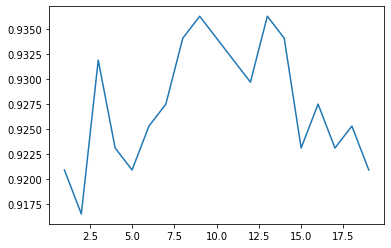

In [162]:
plt.plot(k,score)

In [164]:
clf = KNeighborsClassifier(n_neighbors=5).fit(Xtrain,Ytrain)
clf.score(Xtrain,Ytrain)

0.9494505494505494

In [165]:
clf.score(Xtest,Ytest)

0.9385964912280702

### 标准化

In [166]:
from sklearn.preprocessing import MinMaxScaler    # 0-1标准化：取值范围被压缩至[0,1]
from sklearn.preprocessing import StandardScaler   # z-score标准化：均值为0  一倍标准差为正负1

In [169]:
# 实例化
mms = MinMaxScaler()
# 学习数据特征的结构
mms = mms.fit(X)
# 转换原始数据
X_nor = mms.transform(X)

In [172]:
ss = StandardScaler()
ss = ss.fit(X)
X_nor_1 = ss.transform(X)

In [173]:
clf = KNeighborsClassifier().fit(X_nor_1,y)
clf.score(X_nor_1,y)

0.9806678383128296

In [171]:
clf = KNeighborsClassifier().fit(X,y)
clf.score(X,y)

0.9472759226713533

In [175]:
# 如果要划分数据集应该怎么进行标准化？先划分数据集，再做标准化
# 实例化
mms = MinMaxScaler()
# 学习训练数据特征的结构
mms = mms.fit(Xtrain)
# 分别转换训练集和测试集
Xtrain_nor = mms.transform(Xtrain)
Xtest_nor = mms.transform(Xtest)

In [177]:
clf = KNeighborsClassifier().fit(Xtrain_nor,Ytrain)
clf.score(Xtest_nor,Ytest)  # 预测验证（先做标准化在划分数据集，就会导致模拟题泄露，最终测试结果就会被高估）

0.956140350877193

严格的处理过程：读取数据-划分数据集-数据清洗（double）